In [4]:
#quickstart
from pathlib import Path
import pandas as pd
from bids import BIDSLayout
from joblib import Parallel, delayed
import nilearn
import nibabel as nib
import nltools.prefs as prf
from nilearn import datasets, image, plotting, input_data
from nilearn.masking import apply_mask
from nilearn.image import resample_to_img
from nilearn.image import concat_imgs, index_img
import numpy as np
import matplotlib.pylab as plt

import rpy2
from rpy2.robjects.packages import importr
from pymer4 import Lmer
psych = importr('psych')


import rpy2.robjects as ro
from rpy2.robjects import pandas2ri

from rpy2.robjects.conversion import localconverter

import os
import glob
import seaborn as sns
from nltools.data import Brain_Data, Design_Matrix, Adjacency
from nltools.mask import expand_mask, roi_to_brain
from nltools.stats import zscore
from scipy.stats import binom, ttest_1samp
from sklearn.metrics import pairwise_distances
from nltools.stats import fdr, one_sample_permutation
from copy import deepcopy
from nltools.utils import get_anatomical
import nltools.plotting as nlplt
from datetime import date
from joblib import Parallel, delayed

from sklearn.linear_model import LinearRegression
from sklearn.decomposition import PCA

from nilearn.input_data import NiftiMapsMasker
from nilearn.connectome import ConnectivityMeasure

#dat_paths = pd.read_csv('/data/MBDU/midla/notebooks/campcc/dat_paths_11272019.csv') 
#atlas = image.load_img('/data/MBDU/midla/notebooks/campcc/hox_msdl_atlas.nii.gz')
#sub1 = image.load_img('/data/MBDU/midla/data/derivatives/fmriprep/rn_aroma_20190910_2mm/sub-20900/out/fmrip

%matplotlib inline
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_colwidth', 500)
pd.set_option('display.width', 1000)

from IPython.core.display import display, HTML
display(HTML("<style>"
    + "#notebook { padding-top:0px !important; } " 
    + ".container { width:100% !important; } "
    + ".end_space { min-height:0px !important; } "
    + "</style>"))
import matplotlib.style as style
import seaborn as sns

/gpfs/gsfs11/users/MBDU/midla/env/lib/python3.7/site-packages/sklearn/externals/joblib/__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


In [5]:
style.use('seaborn-white')

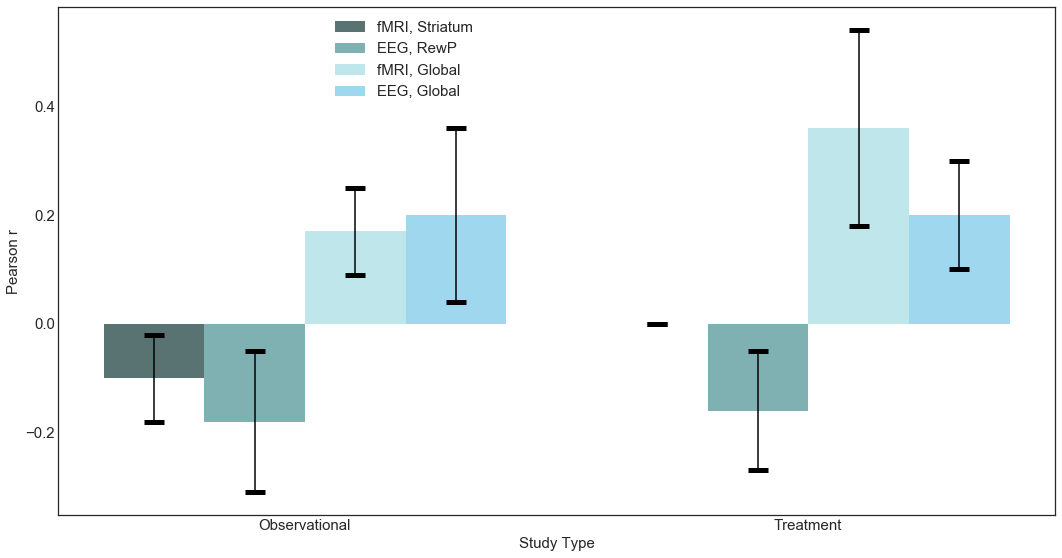

In [18]:
n_groups = 2
means_fmri_stri = (-0.10, 0)
means_eeg_rewp = (-0.18, -0.16)
means_fmri_glob = (0.17,0.36)
means_eeg_glob = (0.20, 0.20)

plt.rcParams.update({'font.size': 15})

# create plot
fig, ax = plt.subplots(figsize=(15,8))
index = np.arange(n_groups)
bar_width = 0.2
opacity = 0.8
cap=10

plt.errorbar(index-(.5*bar_width),means_fmri_stri, yerr=[0.08,0], capsize=10, elinewidth=1.5, markeredgewidth=5,color='black',fmt='none')
plt.errorbar(index+(.5*bar_width),means_eeg_rewp, yerr=[0.13,0.11], capsize=10, elinewidth=1.5, markeredgewidth=5,color='black',fmt='none')
plt.errorbar(index + (.5*bar_width)+bar_width,means_fmri_glob, yerr=[0.08,0.18], capsize=10, elinewidth=1.5, markeredgewidth=5,color='black',fmt='none')
plt.errorbar(index + (.5*bar_width)+(bar_width*2),means_eeg_glob, yerr=[0.16,0.10], capsize=10, elinewidth=1.5, markeredgewidth=5,color='black',fmt='none')

rects1 = plt.bar(index-bar_width,means_fmri_stri, bar_width,
alpha=opacity,color='darkslategray',align='edge',
label='fMRI, Striatum',capsize=20)

rects2 = plt.bar(index, means_eeg_rewp, bar_width,
alpha=opacity,color='cadetblue',align='edge',
label='EEG, RewP',capsize=cap)

rects3 = plt.bar(index + bar_width, means_fmri_glob, bar_width,
alpha=opacity,color='powderblue',align='edge',
label='fMRI, Global',capsize=cap)

rects4 = plt.bar(index + (bar_width*2), means_eeg_glob, bar_width,
alpha=opacity,color='skyblue',align='edge',
label='EEG, Global',capsize=cap)

plt.xlabel('Study Type')
plt.ylabel('Pearson r')
plt.xticks(index + bar_width, ('Observational','Treatment'))
plt.legend(bbox_to_anchor=(.43, 1))

plt.tight_layout()
plt.show()